In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df = pd.read_csv("Q1Data.csv")
df

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,0.065905,...,-0.000861,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber
7191,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,0.038545,...,0.006457,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber
7192,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,0.062748,...,0.008696,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber
7193,-0.519497,-0.307553,-0.004921,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,0.049792,...,0.001924,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber


## Part 1: Decision Tree

In [5]:
col_names = ['MFCCs_ 1', 'MFCCs_ 2', 'MFCCs_ 3', 'MFCCs_ 4', 'MFCCs_ 5', 'MFCCs_ 6', 'Genus']
data = pd.read_csv("Q1Data.csv", usecols=col_names)


In [6]:
# splitting the data
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values.reshape(-1,1)
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.8, random_state=41)

### Part 1a

In [7]:
# node class of the decision tree
class Node:
    def __init__(self, value = None, featureIndex = None, leftBranch  = None, rightBranch = None, threshold=None, infoGain = None):

        # decision node
        self.featureIndex = featureIndex
        self.leftBranch = leftBranch
        self.rightBranch = rightBranch
        self.threshold = threshold
        self.infoGain = infoGain

        # only need value (majority class) for leaf node
        self.value = value




In [8]:
# decision tree classifier
class DecisionTreeClassifier:
    def __init__(self, maxDepth, minSamplesToSplit):
        self.root = None # initialising root node
        # conditions to stop splitting
        self.maxDepth = maxDepth
        self.minSamplesToSplit = minSamplesToSplit

    def split(self, featureIndex, threshold, data):
        # checked
        leftMask = data[:, featureIndex] <= threshold
        rightMask = ~leftMask
        leftData = data[leftMask]
        rightData = data[rightMask]

        return leftData, rightData


    def findBestSplit(self, data, featuresCount):
        maxInfoGain = -1
        bestSplit = {}

        for i in range(featuresCount):
            # extracting all the rows for a particular feature to calc IG
            featureVals = data[:, i]
            thresholds = np.unique(featureVals)

            for threshold in thresholds:
                # for all feature values split based on the current i and threshold
                leftData, rightData = self.split(i, threshold, data)

                if(np.size(leftData) != 0) and (np.size(rightData) != 0):
                    # extracting target values
                    y = data[:, -1]
                    yLeft = leftData[:, -1]
                    yRight = rightData[:, -1]
                    # calc info gain
                    ig = self.calcInfoGain(y, yLeft, yRight)

                    # update best split
                    if(ig > maxInfoGain):
                        bestSplit["threshold"] = threshold
                        bestSplit["featureIndex"] = i
                        bestSplit["leftData"] = leftData
                        bestSplit["rightData"] = rightData
                        bestSplit["infoGain"] = ig
                        maxInfoGain = ig

        return bestSplit

    def giniIndex(self, y):

        labels, counts = np.unique(y, return_counts=True)
        probs = counts / len(y)
        gini = 1 - np.sum(probs ** 2)
        return gini


    def calcInfoGain(self, parent, leftChild, rightChild):
        leftWeight = len(leftChild) / len(parent)
        rightWeight = len(rightChild) / len(parent)

        ig = self.giniIndex(parent) - (leftWeight * self.giniIndex(leftChild) + (rightWeight * self.giniIndex(rightChild)))

        return ig

    def calcLeafVal(self, y):
        y = list(y)
        unique_elements, counts = np.unique(y, return_counts=True)
        # getting most common y value
        return unique_elements[np.argmax(counts)]


    def buildTree(self, data, currDepth):
        x = data[:,:-1]
        y = data[:,-1]

        samplesCount = x.shape[0]
        featuresCount = x.shape[1]

        # keep splitting the tree until we reach the stopping condition
        if(currDepth <= self.maxDepth) and (samplesCount >= self.minSamplesToSplit):
            bestSplit = self.findBestSplit(data, featuresCount)

            # we can only continue splitting if ig = 0, otherwise its a leaf node
            if(bestSplit["infoGain"] > 0):
                leftChild = self.buildTree(bestSplit["leftData"], currDepth+1)
                rightChild = self.buildTree(bestSplit["rightData"], currDepth+1)

                # return the decision node
                return Node(featureIndex= bestSplit["featureIndex"], leftBranch = leftChild, rightBranch= rightChild, threshold = bestSplit["threshold"], infoGain = bestSplit["infoGain"] )

        leafVal = self.calcLeafVal(y)
        return Node(leafVal)

    def print_tree(self, tree=None, indent=" "):
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)
        else:
            print("X_" + str(tree.featureIndex), "<=", tree.threshold, "?", tree.infoGain)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.leftBranch, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.rightBranch, indent + indent)


    def fit(self, x, y):
        # concatenating both x and y into a single data
        data = np.concatenate((x,y), axis = 1)
        self.root = self.buildTree(data, 0)

    def predictPoint(self, subtree, x):
        # if the node's value is not null then return it as it is a leaf node
        if(subtree.value != None):
            return subtree.value
        else:
            index = subtree.featureIndex
            threshold = subtree.threshold
            featureValue = x[index]
            # if less than threshold (true) go left otherwise go right
            if(featureValue <= threshold):
                return self.predictPoint(subtree.leftBranch, x)
            else:
                return self.predictPoint(subtree.rightBranch, x)


    def predict(self, x):
        ypredict = []
        # predicting for every point
        for i in x:
            ypredict.append(self.predictPoint(self.root, i))
        return ypredict


### Part 1b



Max Depth = 1 Accuracy = 0.7725851285615011
Max Depth = 2 Accuracy = 0.8226198749131342
Max Depth = 3 Accuracy = 0.839819318971508
Max Depth = 4 Accuracy = 0.8533703961084086
Max Depth = 5 Accuracy = 0.864141765114663
Max Depth = 6 Accuracy = 0.8726546212647672
Max Depth = 7 Accuracy = 0.8832522585128562
Max Depth = 8 Accuracy = 0.8754343293954134
Max Depth = 9 Accuracy = 0.877866574009729
Max Depth = 10 Accuracy = 0.8764767199444058
Max Depth = 11 Accuracy = 0.876129256428075
Max Depth = 12 Accuracy = 0.8757817929117443
Max Depth = 13 Accuracy = 0.8757817929117443
Max Depth = 14 Accuracy = 0.8754343293954134
Max Depth = 15 Accuracy = 0.8754343293954134


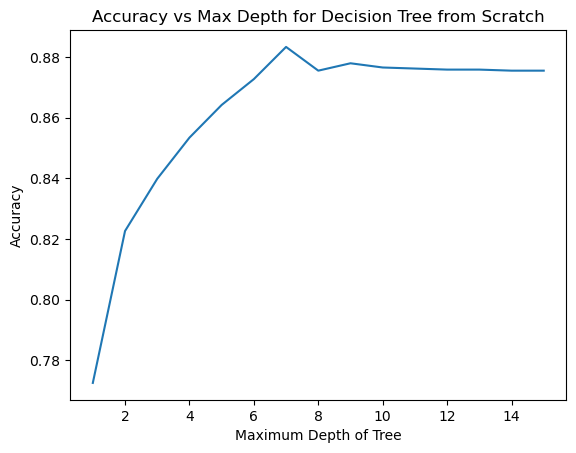

In [10]:

depthCustom = []
DTaccuracyCustom = []

for i in range(1,16):
    classifier = DecisionTreeClassifier(maxDepth=i, minSamplesToSplit=2)
    classifier.fit(xtrain,ytrain)
    Y_pred = classifier.predict(xtest)
    acc = accuracy_score(ytest, Y_pred)
    DTaccuracyCustom.append(acc)
    depthCustom.append(i)

    print("Max Depth =", i, "Accuracy =", acc)

plt.ylabel("Accuracy")
plt.xlabel("Maximum Depth of Tree")
plt.title("Accuracy vs Max Depth for Decision Tree from Scratch")
plt.plot(depthCustom, DTaccuracyCustom)


### Part 1c

As the maximum depth of the tree increases, we see that the accuracy improves up to a certain point. This suggests that increasing complexity by allowing a deeper tree initially leads to better performance on the dataset. However, there is a point where increasing the depth doesn't lead to significant improvements in accuracy. Here we see that this occurs around a maximum depth of 7 or 8, where the accuracy starts to stabilize. Thus we see that though initially more depth improves accuracy, there's a point where the additional depth doesn't translate into a significant gain in performance.

## Part 2 - KNN


In [11]:
# shuffling the dataset

np.random.seed(104)
dataset = df.to_numpy()
np.random.shuffle(dataset)
df = pd.DataFrame(dataset)

mfcc_columns = df.columns[0:21]
# Creating a NumPy array from the MFCC columns
mfcc_array = df[mfcc_columns].values
mfcc_array = np.array(mfcc_array)

geneLabels = df[22].to_numpy()

### Part 2a

In [12]:
# taking index of 40% of the dataset first
split_point = int(0.4 * len(mfcc_array))

# splitting both the mfcc (train) and geneLabels(test) arrays from the dataset into 40% of total
mfcc1, mfcc2 = np.split(mfcc_array, [split_point])
geneLabels1, geneLabels2 = np.split(geneLabels, [split_point])


xtrain, xtest, ytrain, ytest = train_test_split(mfcc1, geneLabels1, test_size=0.25, shuffle= False)
print(xtrain.shape, xtest.shape)



(2158, 21) (720, 21)


In [13]:
# splitting the 40% into 30-10 further
splitsize = int(0.75*len(mfcc1))
xtrain, xtest = np.split(mfcc1, [splitsize])
ytrain, ytest = np.split(geneLabels1, [splitsize])


In [14]:
# knn with euclidean distance
kAcc = {}
from sklearn.metrics import accuracy_score

for k in range(1,51):
    predictedLabels =  []
    for testrec in xtest:

        expandedxtest = np.repeat(testrec.reshape(1, -1), xtrain.shape[0], axis=0)
        diff = np.subtract(expandedxtest, xtrain).astype(float)
        sq = np.square(diff).astype(float)
        axissum = np.sum(sq, axis = 1).astype(float)
        eucdist = np.sqrt(axissum).astype(float)  # eucl distance btw given test pt and train pt

        sortedInd = np.argsort(eucdist.astype(float))
        kNearestNeighbours = sortedInd[:k]
        k_nearest_labels = ytrain[kNearestNeighbours]

        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        most_common_label = unique_labels[np.argmax(counts)]
        predictedLabels.append(most_common_label)

    accuracy = accuracy_score(predictedLabels, ytest)
    print("k = ", k, " accuracy = ", accuracy)
    kAcc[k] = accuracy


k =  1  accuracy =  0.9847222222222223
k =  2  accuracy =  0.9819444444444444
k =  3  accuracy =  0.9819444444444444
k =  4  accuracy =  0.9777777777777777
k =  5  accuracy =  0.9708333333333333
k =  6  accuracy =  0.9694444444444444
k =  7  accuracy =  0.9694444444444444
k =  8  accuracy =  0.9638888888888889
k =  9  accuracy =  0.9625
k =  10  accuracy =  0.9611111111111111
k =  11  accuracy =  0.9583333333333334
k =  12  accuracy =  0.9555555555555556
k =  13  accuracy =  0.95
k =  14  accuracy =  0.95
k =  15  accuracy =  0.9486111111111111
k =  16  accuracy =  0.9486111111111111
k =  17  accuracy =  0.9486111111111111
k =  18  accuracy =  0.9430555555555555
k =  19  accuracy =  0.9430555555555555
k =  20  accuracy =  0.9430555555555555
k =  21  accuracy =  0.9430555555555555
k =  22  accuracy =  0.9430555555555555
k =  23  accuracy =  0.9416666666666667
k =  24  accuracy =  0.9388888888888889
k =  25  accuracy =  0.9430555555555555
k =  26  accuracy =  0.9375
k =  27  accuracy =  

### Part 2b

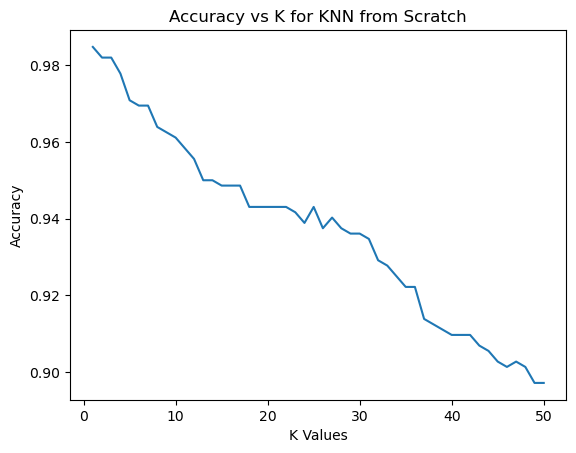

In [15]:
import matplotlib.pyplot as plt
kValCustom = list(kAcc.keys())
knnAccCustom = list(kAcc.values())

# Plot the graph
plt.plot(kValCustom, knnAccCustom)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K for KNN from Scratch")

plt.show()

### Part 2c

Here we see in our model as the value of K increases from 1 to 50 the accuracy begins to reduce overall. This shows that our model performs better when it is only classifying a point based on a few of its nearest neighbours. As the number of neighbours we classify on increase the more poorly our model behaves.

## Part 3: Using Sklearn Functions

### KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
xtrain, xtest, ytrain, ytest = train_test_split(mfcc_array, geneLabels, test_size=0.2)

SknnAcc = []
SKVal = []

for k in range(1,1001):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrain, ytrain)
    ypred = knn.predict(xtest)
    acc = accuracy_score(ypred, ytest)

    print("k = ", k, " accuracy = ", acc)
    SKVal.append(k)
    SknnAcc.append(acc)

k =  1  accuracy =  0.9888811674774148
k =  2  accuracy =  0.9867963863794301
k =  3  accuracy =  0.9861014593467686
k =  4  accuracy =  0.9833217512161223
k =  5  accuracy =  0.9833217512161223
k =  6  accuracy =  0.9819318971507992
k =  7  accuracy =  0.9819318971507992
k =  8  accuracy =  0.980542043085476
k =  9  accuracy =  0.980542043085476
k =  10  accuracy =  0.980542043085476
k =  11  accuracy =  0.980542043085476
k =  12  accuracy =  0.9791521890201529
k =  13  accuracy =  0.9791521890201529
k =  14  accuracy =  0.9784572619874913
k =  15  accuracy =  0.9770674079221682
k =  16  accuracy =  0.9770674079221682
k =  17  accuracy =  0.9770674079221682
k =  18  accuracy =  0.9770674079221682
k =  19  accuracy =  0.9770674079221682
k =  20  accuracy =  0.9756775538568451
k =  21  accuracy =  0.9763724808895066
k =  22  accuracy =  0.9756775538568451
k =  23  accuracy =  0.9749826268241835
k =  24  accuracy =  0.9749826268241835
k =  25  accuracy =  0.9742876997915219
k =  26  accu

### Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
SDtAcc = []
SMaxDepth = []

for depth in range(1, 16):
    dt = DecisionTreeClassifier(max_depth=depth, random_state=41)
    dt.fit(xtrain, ytrain)
    acc = dt.score(xtest, ytest)
    SMaxDepth.append(depth)
    SDtAcc.append(acc)



### Part 3c

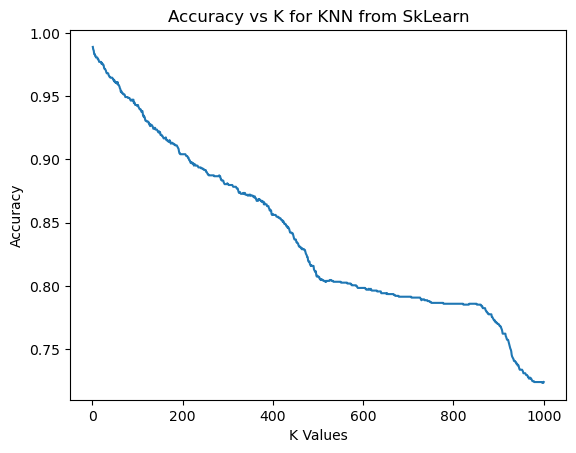

In [18]:
import matplotlib.pyplot as plt

plt.plot(SKVal, SknnAcc)
plt.xlabel("K Values")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K for KNN from SkLearn")


plt.show()

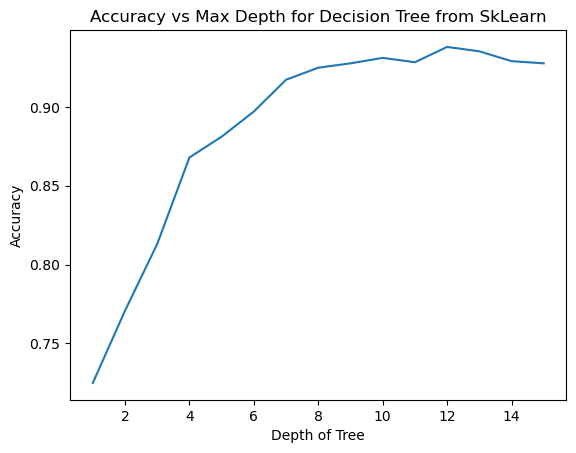

In [19]:
import matplotlib.pyplot as plt

plt.plot(SMaxDepth, SDtAcc)
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Max Depth for Decision Tree from SkLearn")


plt.show()

### Part 3d

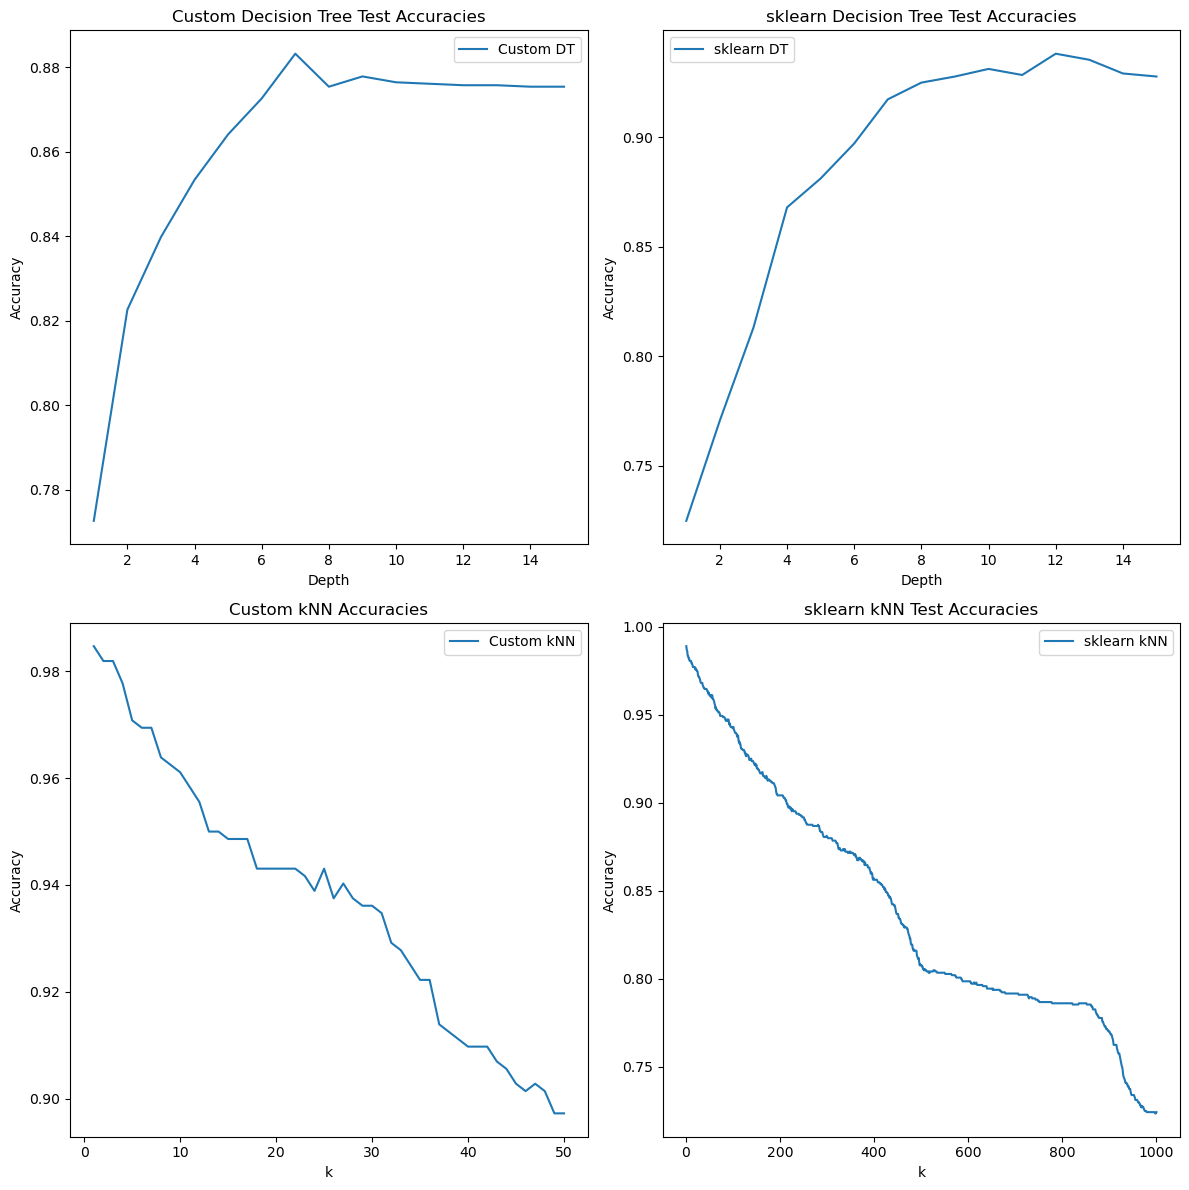

In [20]:
plt.figure(figsize=(12, 12))

# Plotting Custom Decision Tree
plt.subplot(2, 2, 1)
plt.plot(depthCustom, DTaccuracyCustom, label='Custom DT')
plt.title('Custom Decision Tree Test Accuracies')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

# Plotting sklearn Decision Tree
plt.subplot(2, 2, 2)
plt.plot(SMaxDepth, SDtAcc, label='sklearn DT')
plt.title('sklearn Decision Tree Test Accuracies')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Custom kNN
plt.subplot(2, 2, 3)
plt.plot(kValCustom, knnAccCustom, label='Custom kNN')
plt.title('Custom kNN Accuracies')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

# Plotting sklearn kNN
plt.subplot(2, 2, 4)
plt.plot(SKVal, SknnAcc, label='sklearn kNN')
plt.title('sklearn kNN Test Accuracies')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Here we see that our KNN and decision tree model performs almost similar to the sklearn functions in terms of accuracy but both of them have a higher compute time than the built-in functions.